In [2]:
import plot_utils
import matplotlib.pyplot as plt
import numpy as np
import math

TITLE_FONT = {'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}
smaller_font = {'fontname': 'Arial', 'fontsize': 10, 'fontweight': 'normal'}
tiny_fontsize = 8
micro_fontsize = 5
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

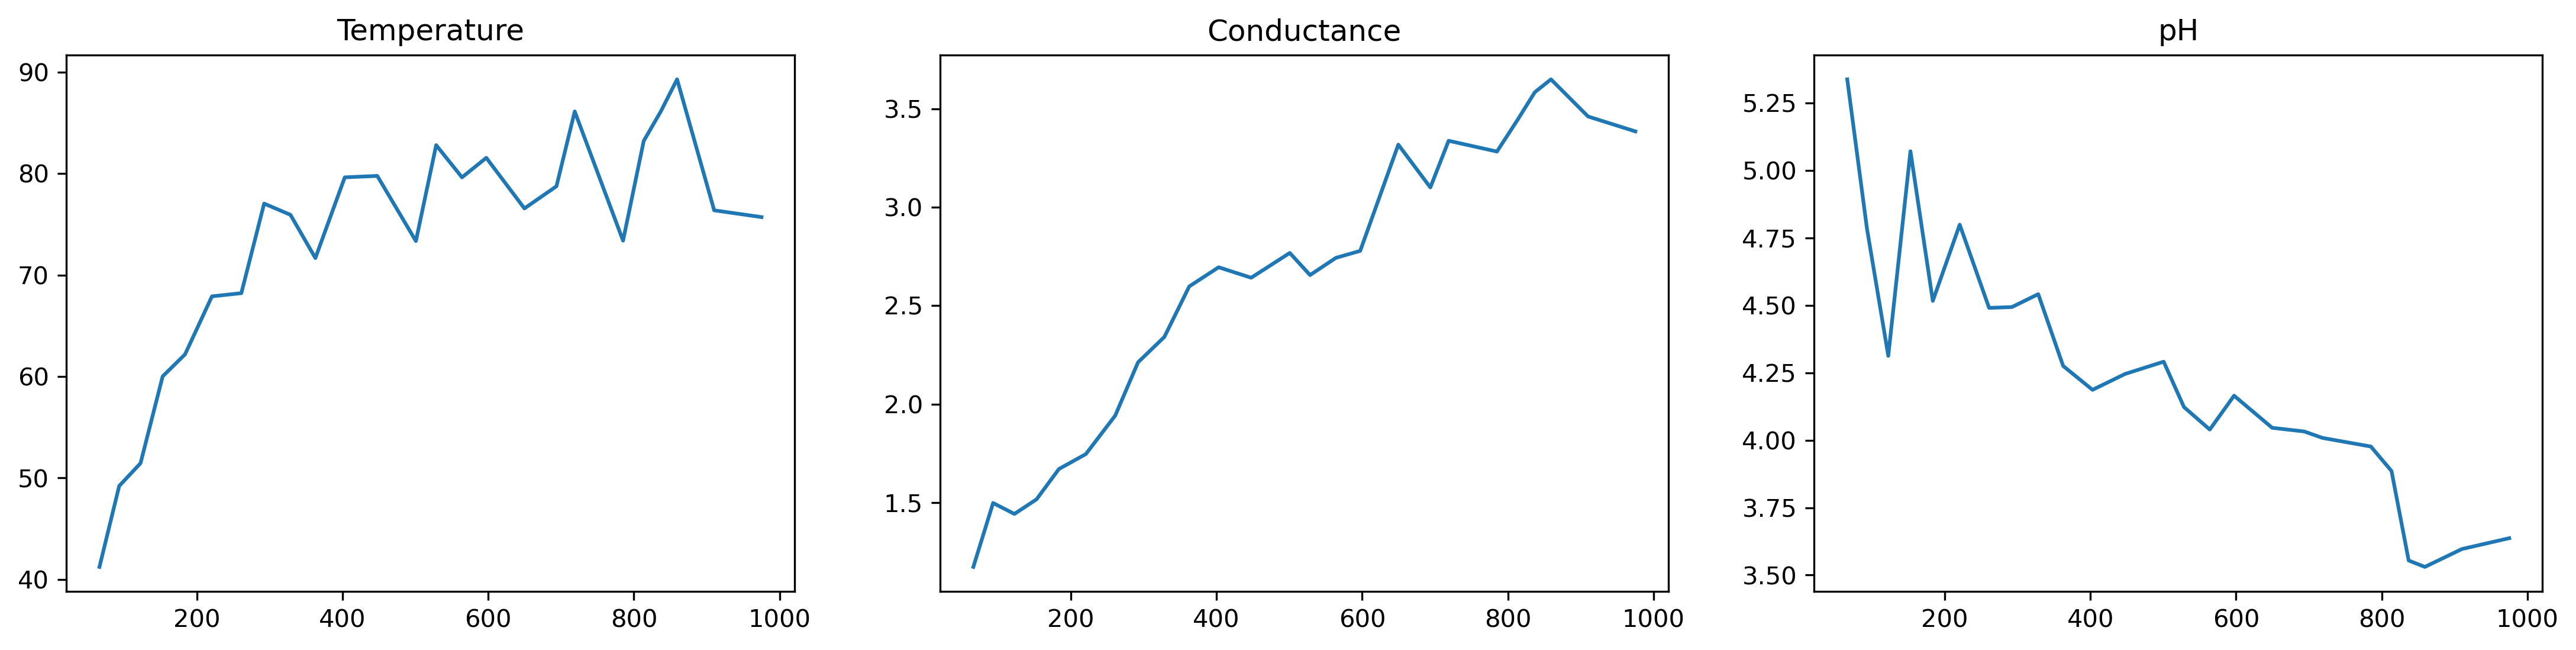

In [2]:
t_point, T_point, G_point, pH_point = plot_utils.analyse_and_plot("Data/0518-4--pH--G--T.npy")

In [7]:
#T related
r = 0.1 # bowl radius
c = 4.2e3 #specific heat capacity of soup
rho = 1e3 # density of soup
l = 0.025 # soup height
h_side = 50 # natural convection coefficient through side
h_top = 50 # natural convection coefficient through top
hob_rate = 6 # hob rate as shown on the hob
# P = 1 # PWM percentage for pot on hob
T_inf = 20 # room temperature

Q_in = 4.88 * 2 ** hob_rate # heat addition rate per unit time

T0 = T_inf

#G related
G_0 = 0.8
alpha_G = 0.479
beta_G = 0.005
gamma_G = 12000

#pH related
alpha_pH = 10**(-5.3)
beta_pH = 0.5

#n_s related
alpha_t = 10**(-3.5)
k_1 = 0.00008
k_2 = 0.005
k = 1e-6
V_t = 0.2
V_s = 1

def f_G(G_raw, T):
    c = 0.2
    rate = 0.02    
    return (-c*np.exp(-rate*(T-25))+(c+1)) * G_raw

def f_pH(pH_raw, T):
    correction_factor = 10e-4
    return (pH_raw - correction_factor * (T - 25) * (pH_raw - 4))

def simulationStandard(Q, index, salt, vinegar, dt = 0.1):
    alpha_t = 10**(-3.1)
    t = 0
    T = T0
    G = 0
    pH = 0
    n_s = 0
    m_s = 0
    m_v = 0
    t_total = len(Q) * dt
    
    counter = 0
    data = []
    
    while t < t_total:
        t += dt
        T += 1/(c*rho*l*math.pi*r**2)*(-(T-T_inf)*(h_top*math.pi*r**2 + 2*h_side*math.pi*r*l) + Q[counter]) * dt
        G_raw = G_0 + alpha_G*m_s + beta_G*m_v + gamma_G*n_s
        G = f_G(G_raw, T)
        n_s += k_1*np.exp(k_2*(T-25))*(alpha_t - n_s*(1/V_t + 1/V_s))
        pH_raw = -np.log10(10e-7 + alpha_pH*m_v + n_s*beta_pH)
        pH = f_pH(pH_raw, T)
        if round(t, 1) in index:
            m_s += int(salt[np.where(index == round(t, 1))])
            m_v += int(vinegar[np.where(index == round(t, 1))]) * 10
            print("m_s, m_v:", m_s, m_v)
        
        counter += 1
        data.append([t, T, G, pH, n_s])

    return np.array(data)

In [8]:
# time, G, pH, RTD1, RTD2, VCC, Vref, data = load_raw_data("Data/0518-4--pH--G--T.npy")
# segments = find_segment(G)
# t_point, T_point, G_point, pH_point = calculate_data_points(data, segments)
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18,10))

Q = np.array([1]*3700 + [0.25]*7300) * 4.88*2**7
index = np.array([600, 750])
salt = np.array([0.2, 0]) * 10
vinegar = np.array([0, 0.3]) * 10

standardData = simulationStandard(Q, index, salt, vinegar)

standard_t = standardData[:,0]
standard_T = standardData[:,1]
standard_G = standardData[:,2]
standard_pH = standardData[:,3]
standard_n_s = standardData[:,4]

m_s, m_v: 2 0
m_s, m_v: 2 30


In [22]:
#bowl dimensions
r = 0.2
h = 0.2
Across = math.pi * r**2
Aside = 2*math.pi*r*h
t = 0.05

hside = 10
htop = 10
lambda_bottom = 2


def calculateTemperatures(steps = 2000, dt = 0.5, Tinitial = 75, height = 0.2):
    Tsoup = Tinitial
    
    r = 0.0825 # bowl radius
    h = height # soup height
    Across = math.pi * r**2 # cross-sectional area
    Aside = 2*math.pi*r*h # side area
    t = 0.02 # effective thickness of bottom conductivity part
    Tinf = 25 # temperature of environment
    rho = 1e3 # density of soup
    m = rho * Across * h # mass
    c = 4.2e3 #specific heat capacity of soup
    
    Tdata = []
    
    for i in range(steps):
        Qrate_side = (Tsoup - Tinf)*hside*Aside
        Qrate_top = (Tsoup - Tinf)*htop*Across
        Qrate_bottom = Across*lambda_bottom*(Tsoup - Tinf)/t
        Qloss = (Qrate_side + Qrate_top + Qrate_bottom)*dt
        Tdrop = Qloss / (m*c)
        Tsoup = Tsoup - Tdrop
        Tdata.append(Tsoup)
        
    timedata = np.arange(start = 0, stop = dt * steps, step = dt)
    Tdata = np.array(Tdata)
    return timedata, Tdata
    
    
timedata, Tdata1 = calculateTemperatures(height = 0.01)
timedata, Tdata2 = calculateTemperatures(height = 0.02)
timedata, Tdata3 = calculateTemperatures(height = 0.03)
timedata, Tdata4 = calculateTemperatures(height = 0.04)
timedata, Tdata5 = calculateTemperatures(height = 0.05)

In [23]:
timedata2 = np.arange(0,700,10)
Tdata6 = np.array([76, 76, 75, 74, 74, 74, 74, 74, 73, 73, 73, 72, 72, 72, 72, 71, 71, 71, 71, 70, 70, 70, 69, 69, 69, 69, 69, 68, 68, 68, 68, 68, 67, 67, 67, 67, 66, 66, 66, 66, 65, 65, 65, 65, 65, 65, 64, 64, 64, 64, 64, 63, 63, 63, 63, 62, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 61, 60, 60, 60])

Tdata7 = np.array([75, 74, 74, 74, 73, 73, 72, 72, 71, 72, 71, 71, 70, 70, 70, 70, 69, 69, 68, 68, 68, 68, 67, 67, 67, 66, 66, 66, 66, 66, 66, 65, 65, 64, 64, 64, 64, 64, 63, 64, 63, 62, 63, 62, 62, 62, 62, 62, 61, 61, 60, 60, 60, 60, 60, 60, 59, 59, 59, 59, 59, 58, 58, 58, 58, 58, 58, 57, 57, 57])

Tdata8 = np.array([75, 74, 74, 73, 72, 71, 72, 71, 70, 70, 70, 69, 69, 68, 68, 67, 67, 67, 66, 66, 66, 65, 64, 64, 64, 63, 62, 62, 62, 62, 62, 62, 61, 61, 61, 60, 60, 60, 60, 59, 59, 59, 58, 58, 58, 58, 58, 57, 57, 57, 56, 56, 56, 56, 55, 55, 55, 55, 55, 54, 54, 54, 54, 54, 53, 53, 53, 52, 53, 52])

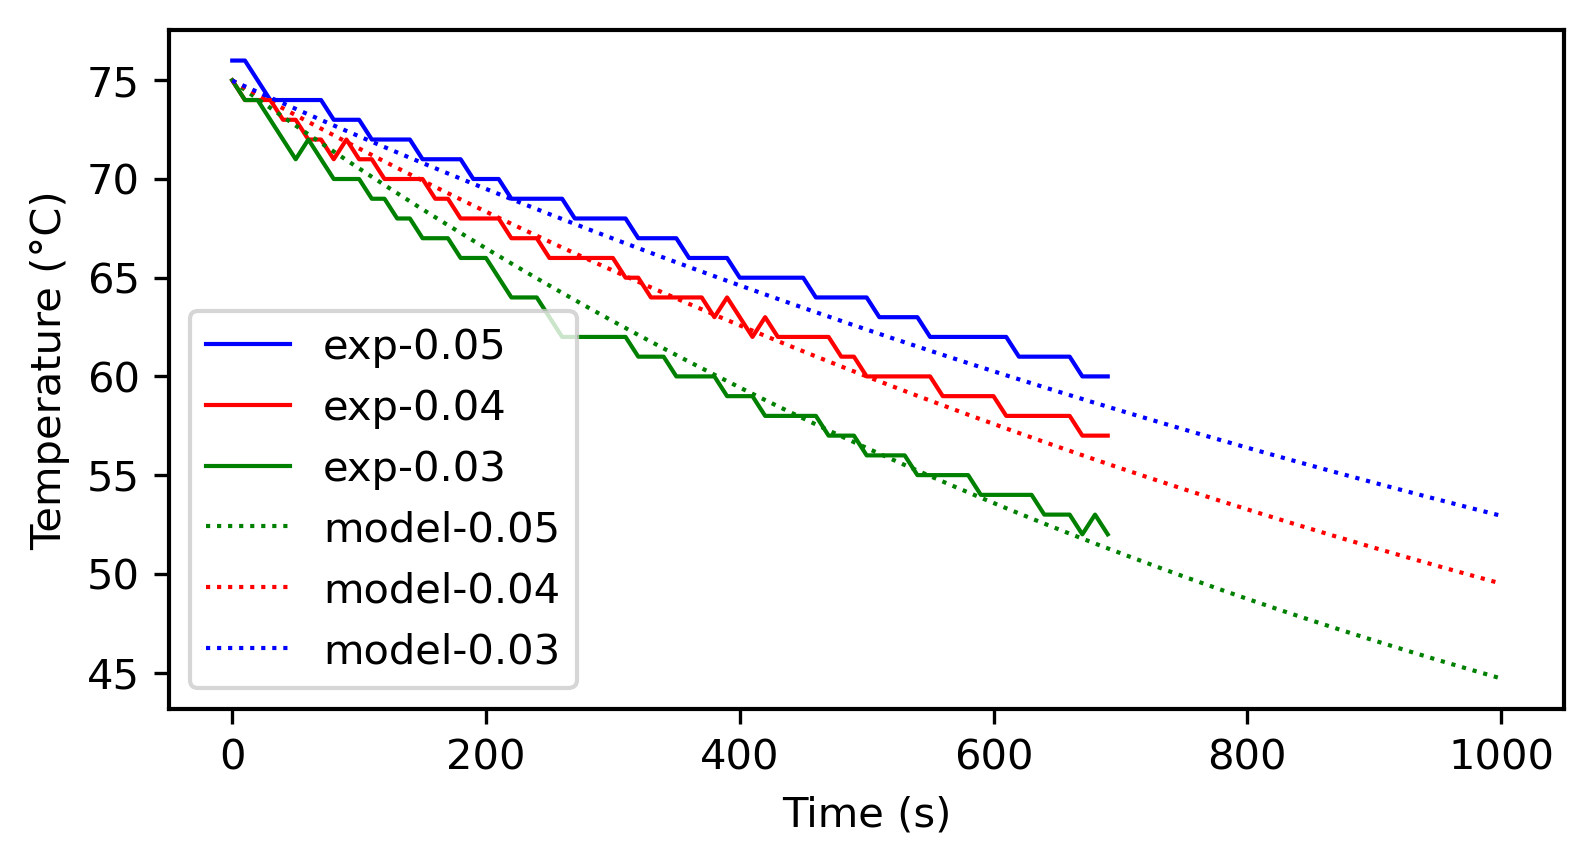

In [46]:
plt.rcParams["figure.figsize"] = (6, 3)
plotwidth = 1
borderwidth = 1

# plt.xticks([])
# plt.yticks([])
plt.gca().spines['left'].set_linewidth(borderwidth)
plt.gca().spines['bottom'].set_linewidth(borderwidth)
plt.gca().spines['right'].set_linewidth(borderwidth)
plt.gca().spines['top'].set_linewidth(borderwidth)
plt.plot(timedata2, Tdata6, label = "exp-0.05", color = "b", linewidth = plotwidth)
plt.plot(timedata2, Tdata7, label = "exp-0.04", color = "r", linewidth = plotwidth)
plt.plot(timedata2, Tdata8, label = "exp-0.03", color = "g", linewidth = plotwidth)
plt.plot(timedata, Tdata3, label = "model-0.05", color = "g", linestyle = "dotted", linewidth = plotwidth)
plt.plot(timedata, Tdata4, label = "model-0.04", color = "r", linestyle = "dotted", linewidth = plotwidth)
plt.plot(timedata, Tdata5, label = "model-0.03", color = "b", linestyle = "dotted", linewidth = plotwidth)
plt.ylabel("Temperature (°C)")
plt.xlabel("Time (s)")
plt.legend()

C:\Users\shiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\shiji\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 
1.096 x + 1.082


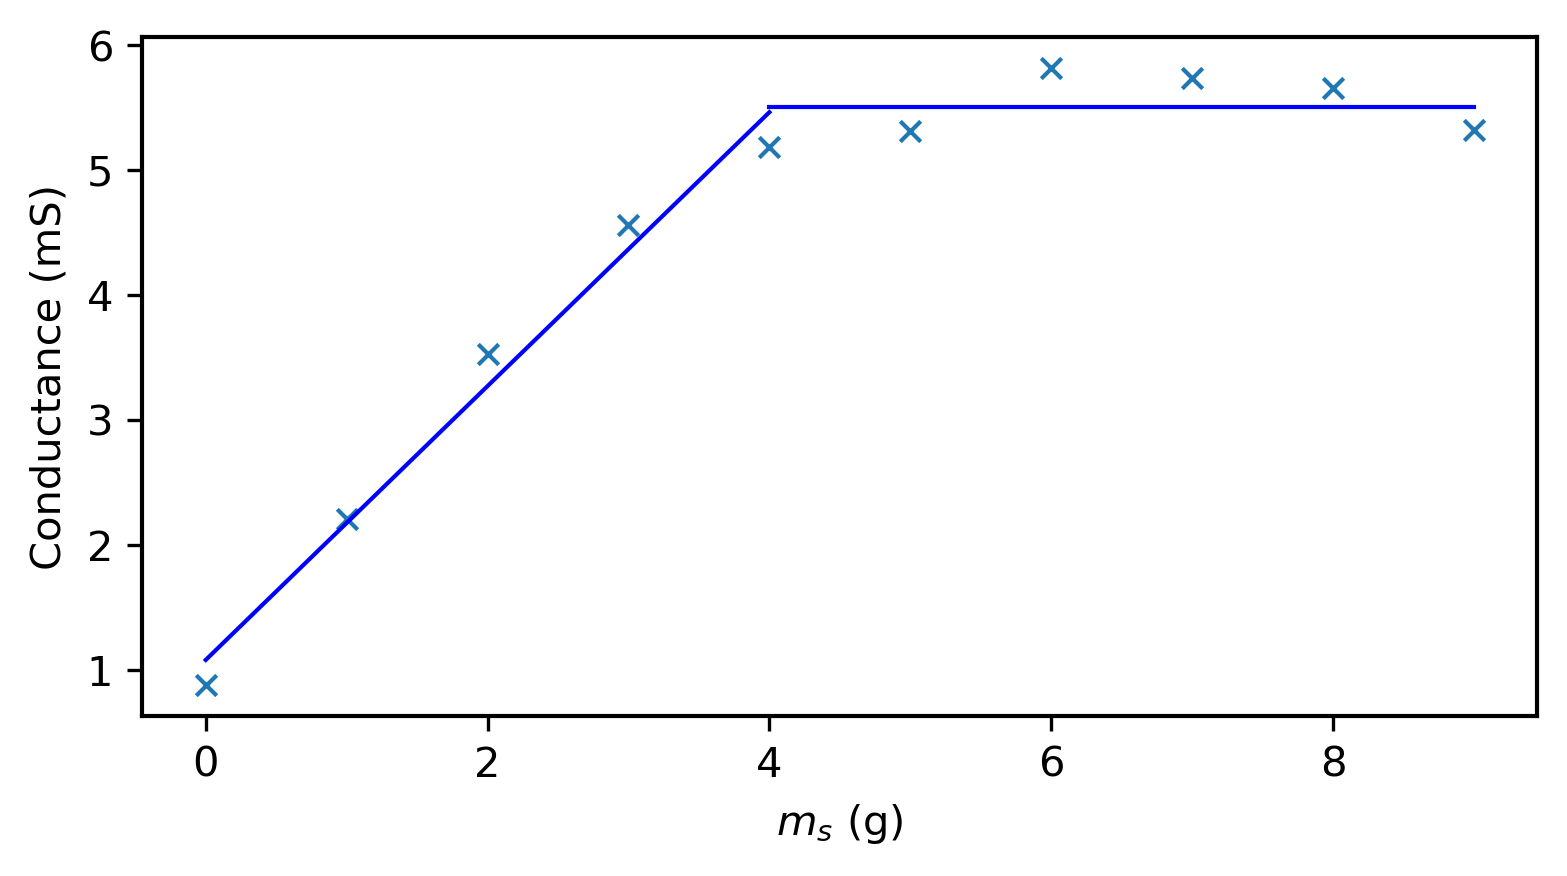

In [49]:
plt.rcParams["figure.figsize"] = (6, 3)
plotwidth = 1
borderwidth = 1

time, G, pH, RTD1, RTD2, VCC, Vref, data = plot_utils.load_raw_data("Data/0518-2--pH--G--T.npy")
segments = plot_utils.find_segment(G, G_threshold = 4.5, padding = 2)
t_point, T_point, G_point, pH_point = plot_utils.calculate_data_points(data, segments, T_backwards = 5, G_forwards = 5)

saltConcentration = np.linspace(0,9,10)
conductivity = G_point[:10]

plt.gca().spines['left'].set_linewidth(borderwidth)
plt.gca().spines['bottom'].set_linewidth(borderwidth)
plt.gca().spines['right'].set_linewidth(borderwidth)
plt.gca().spines['top'].set_linewidth(borderwidth)

plt.scatter(saltConcentration, conductivity, marker = "x", s = 24, linewidths = plotwidth)

plt.plot(np.unique(saltConcentration[:5]), np.poly1d(np.polyfit(saltConcentration[:5], conductivity[:5], 1))(np.unique(saltConcentration[:5])), color = "Blue", linewidth = plotwidth)
plt.plot(saltConcentration[4:], np.average(conductivity[4:])*np.ones(6), color = "Blue", linewidth = plotwidth)
plt.ylabel("Conductance (mS)")
plt.xlabel("$m_s$ (g)")
print(np.poly1d(np.polyfit(saltConcentration[:5], conductivity[:5], 1)))

 
0.004261 x + 1.084


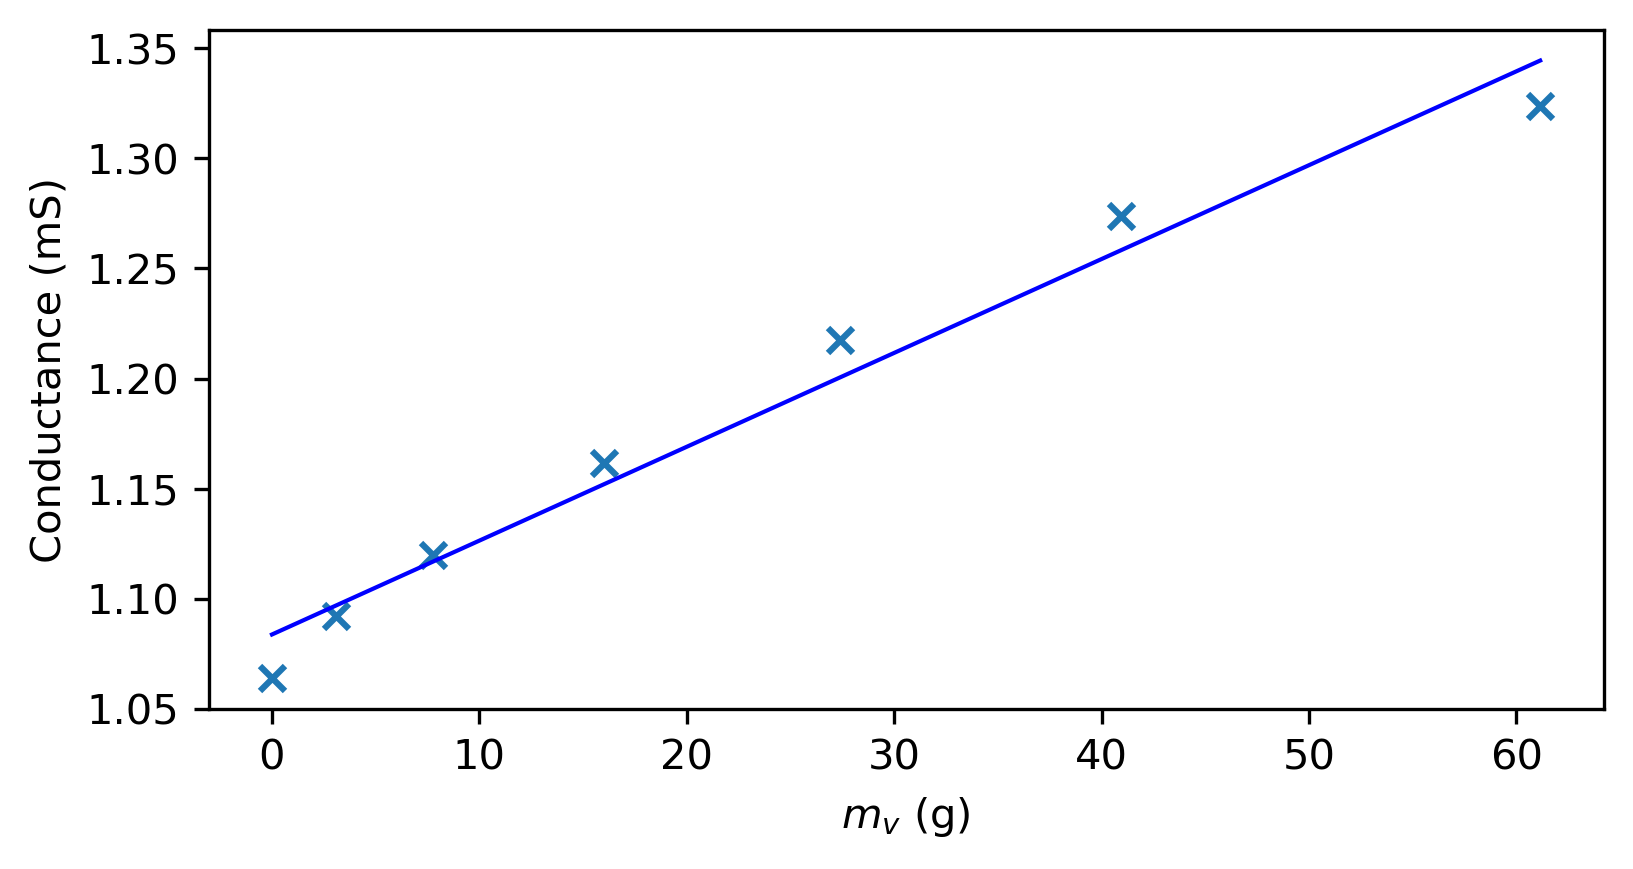

In [47]:
t_point, T_point, G_point, pH_point = plot_utils.analyse_and_plot("Data/0522-2--pH--G--T.npy", False)
plt.rcParams["figure.figsize"] = (6, 3)
plotwidth = 1
borderwidth = 1

m_v = np.array([0, 3.07, 7.75, 16.03, 27.37, 40.92, 61.15])
plt.scatter(m_v, G_point, marker = "x")
plt.plot(np.unique(m_v), np.poly1d(np.polyfit(m_v, G_point, 1))(np.unique(m_v)), color = "Blue", linewidth = plotwidth)

plt.ylabel("Conductance (mS)")
plt.xlabel("$m_v$ (g)")
print(np.poly1d(np.polyfit(m_v, G_point, 1)))


 
5.847e-06 x - 3.118e-05


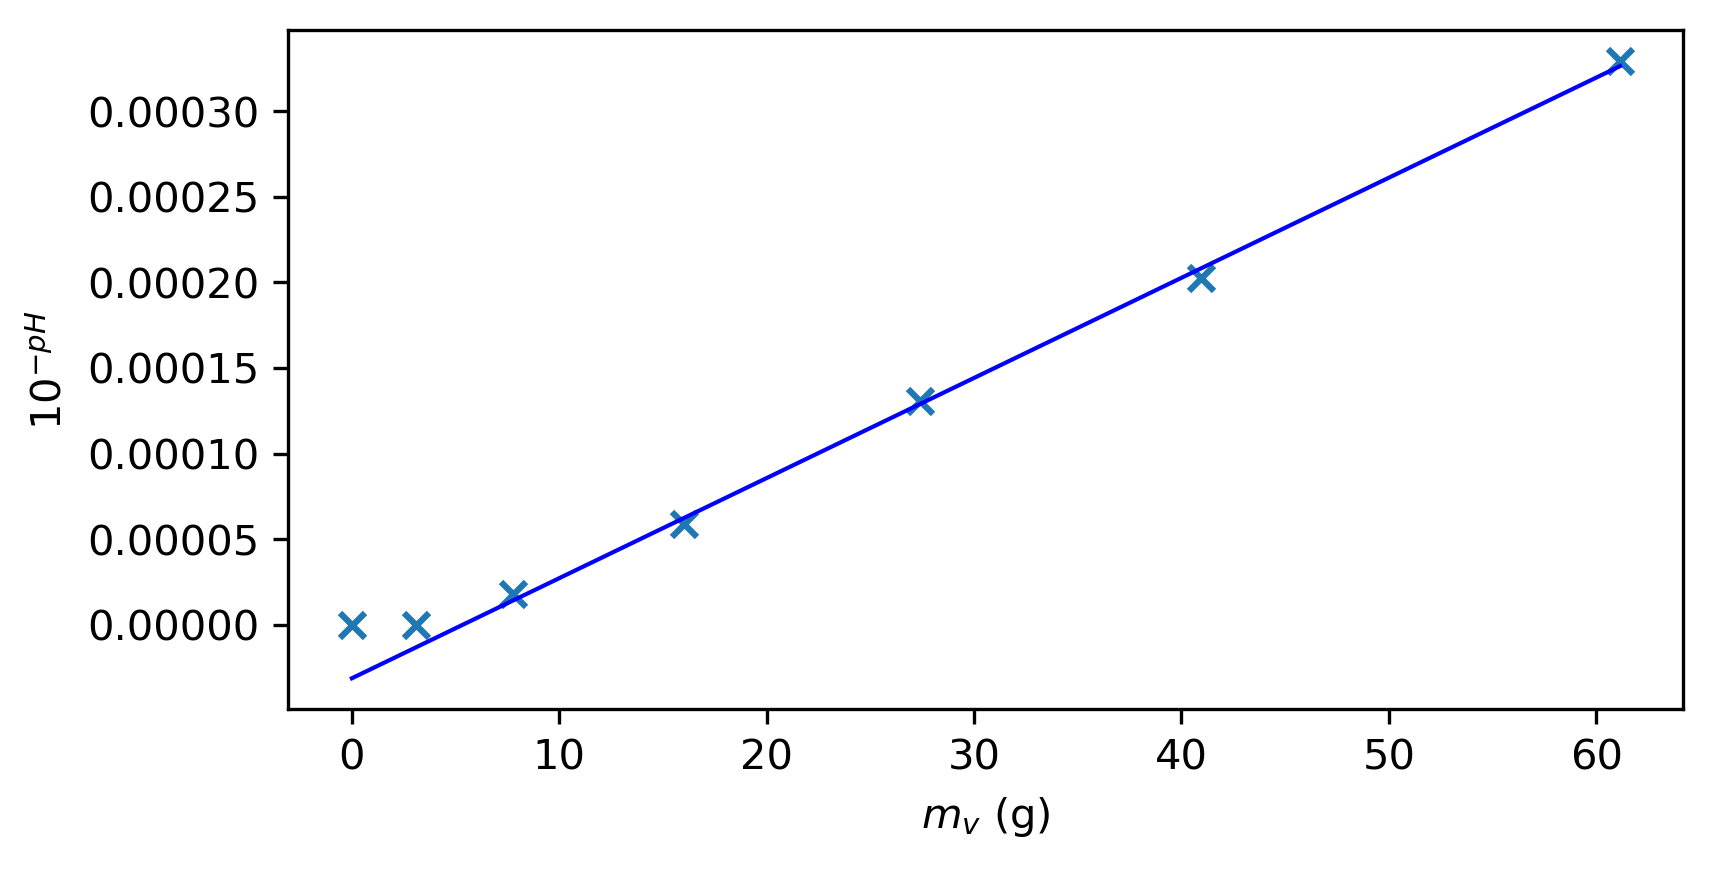

In [45]:
plt.scatter(m_v, 10**(-pH_point), marker = "x")
plt.plot(np.unique(m_v), np.poly1d(np.polyfit(m_v[2:], 10**(-pH_point)[2:], 1))(np.unique(m_v)), color = "Blue", linewidth = plotwidth)

plt.ylabel("$10^{-pH}$")
plt.xlabel("$m_v$ (g)")

print(np.poly1d(np.polyfit(m_v[2:], 10**(-pH_point)[2:], 1)))

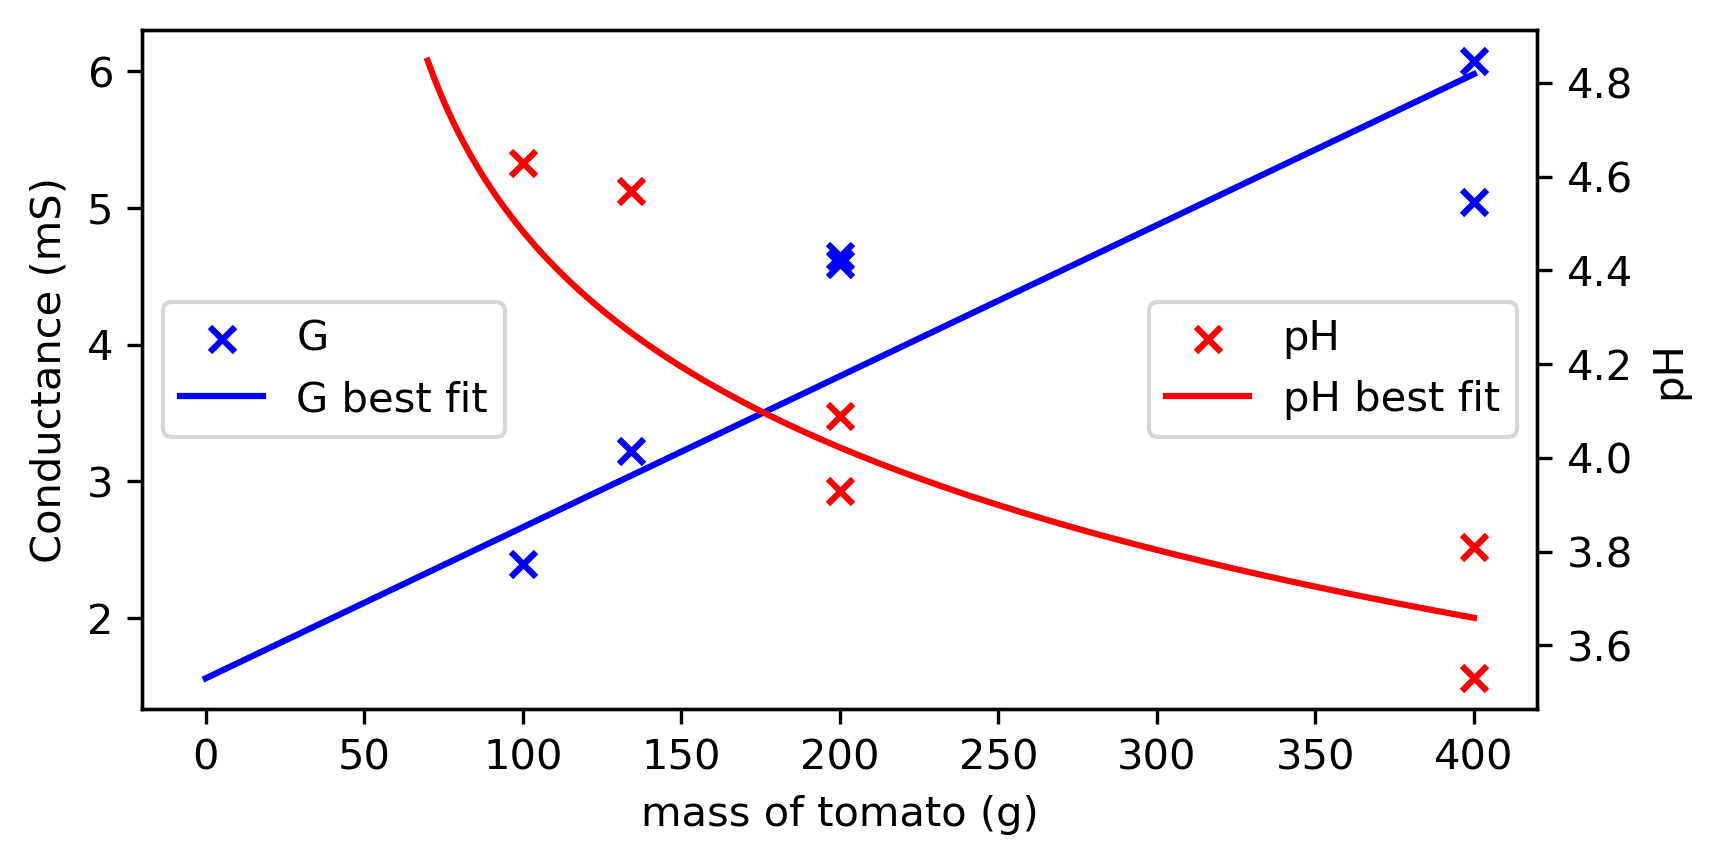

In [58]:
m_t = np.array([1, 100, 200, 400, 134, 200, 400])
G_point = np.array([0.8, 2.3935, 4.6464, 5.045, 3.22, 4.59, 6.08])
pH_point = np.array([6.0, 4.63, 3.93, 3.81, 4.57, 4.09, 3.53])

plt.rcParams["figure.figsize"] = (6, 3)

# Create the figure and left y-axis
fig, ax1 = plt.subplots()

# Plot the first dataset on the left y-axis
ax1.scatter(m_t[1:], G_point[1:], label = "G", color = "Blue", marker = "x")
x = np.array([0, 400])
y = 0.01106 * x + 1.557
ax1.plot(x, y, color = "Blue", label = "G best fit")
ax1.set_ylabel("Conductance (mS)")
ax1.set_xlabel("mass of tomato (g)")

# Create the right y-axis
x = np.linspace(70, 400, 400)
y = - np.log10(6.214e-07*x - 2.929e-05)

ax2 = ax1.twinx()
ax2.scatter(m_t[1:], pH_point[1:], label = "pH", color = "Red", marker = "x")
ax2.plot(x, y, color = "Red", label = "pH best fit")
ax2.set_ylabel("pH")
ax1.legend(loc = 'center left')
ax2.legend(loc = 'center right')


 
6.214e-07 x - 2.929e-05


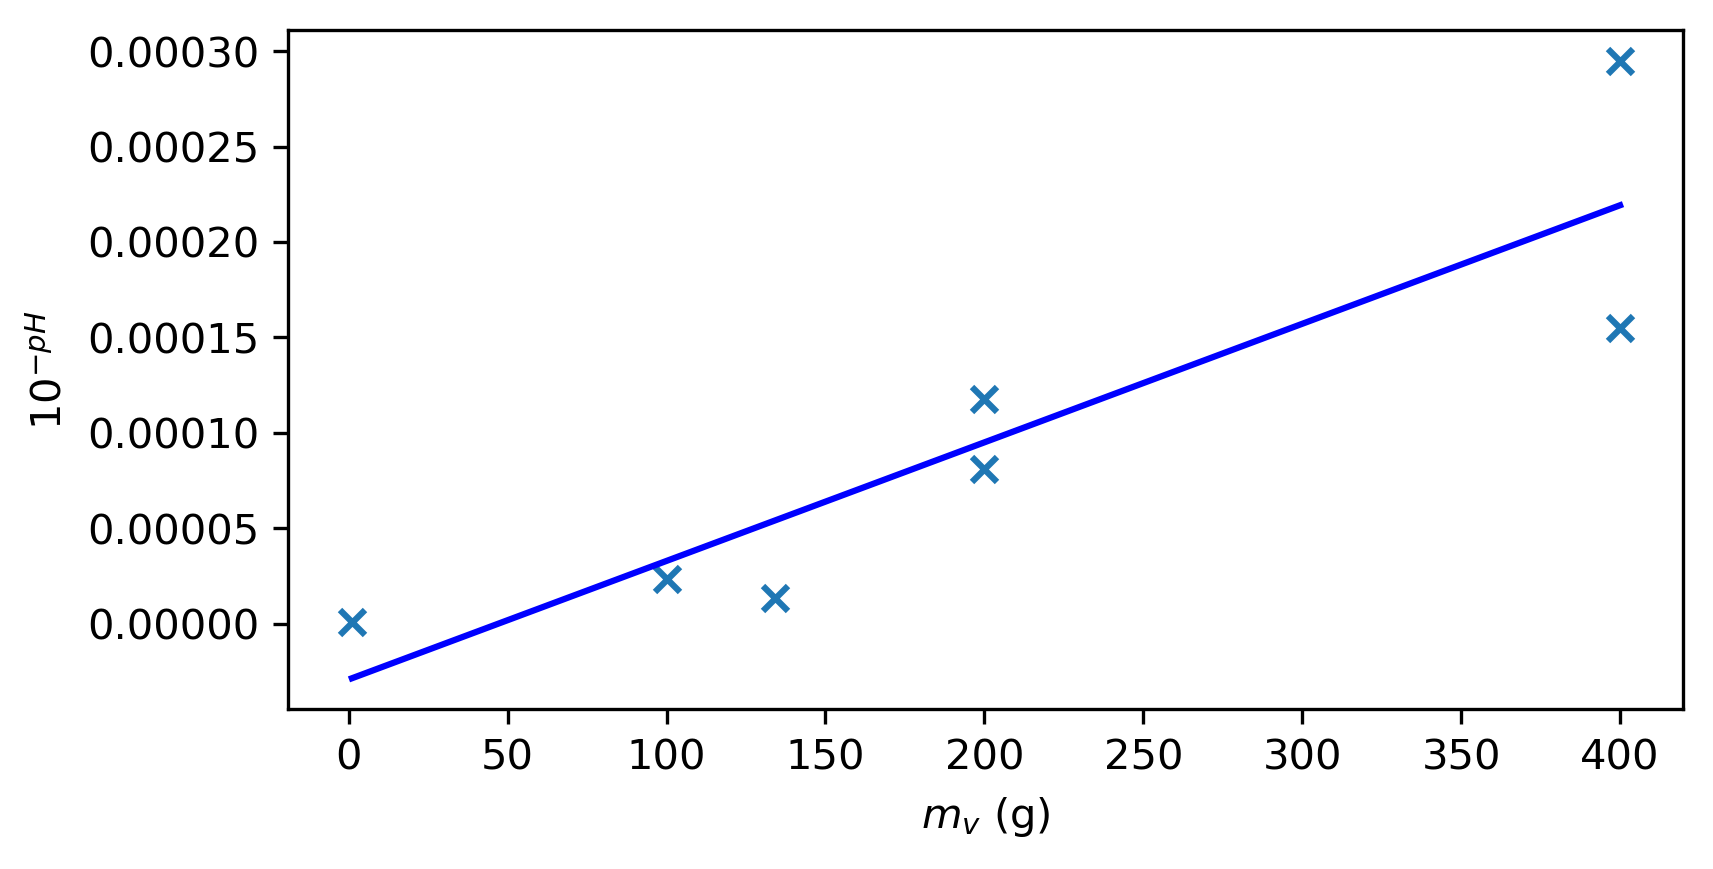

In [22]:
plt.scatter(m_t, 10**(-pH_point), marker = "x")
plt.plot(np.unique(m_t), np.poly1d(np.polyfit(m_t, 10**(-pH_point), 1))(np.unique(m_t)), color = "Blue")

plt.ylabel("$10^{-pH}$")
plt.xlabel("$m_v$ (g)")

print(np.poly1d(np.polyfit(m_t, 10**(-pH_point), 1)))

 
0.01106 x + 1.557


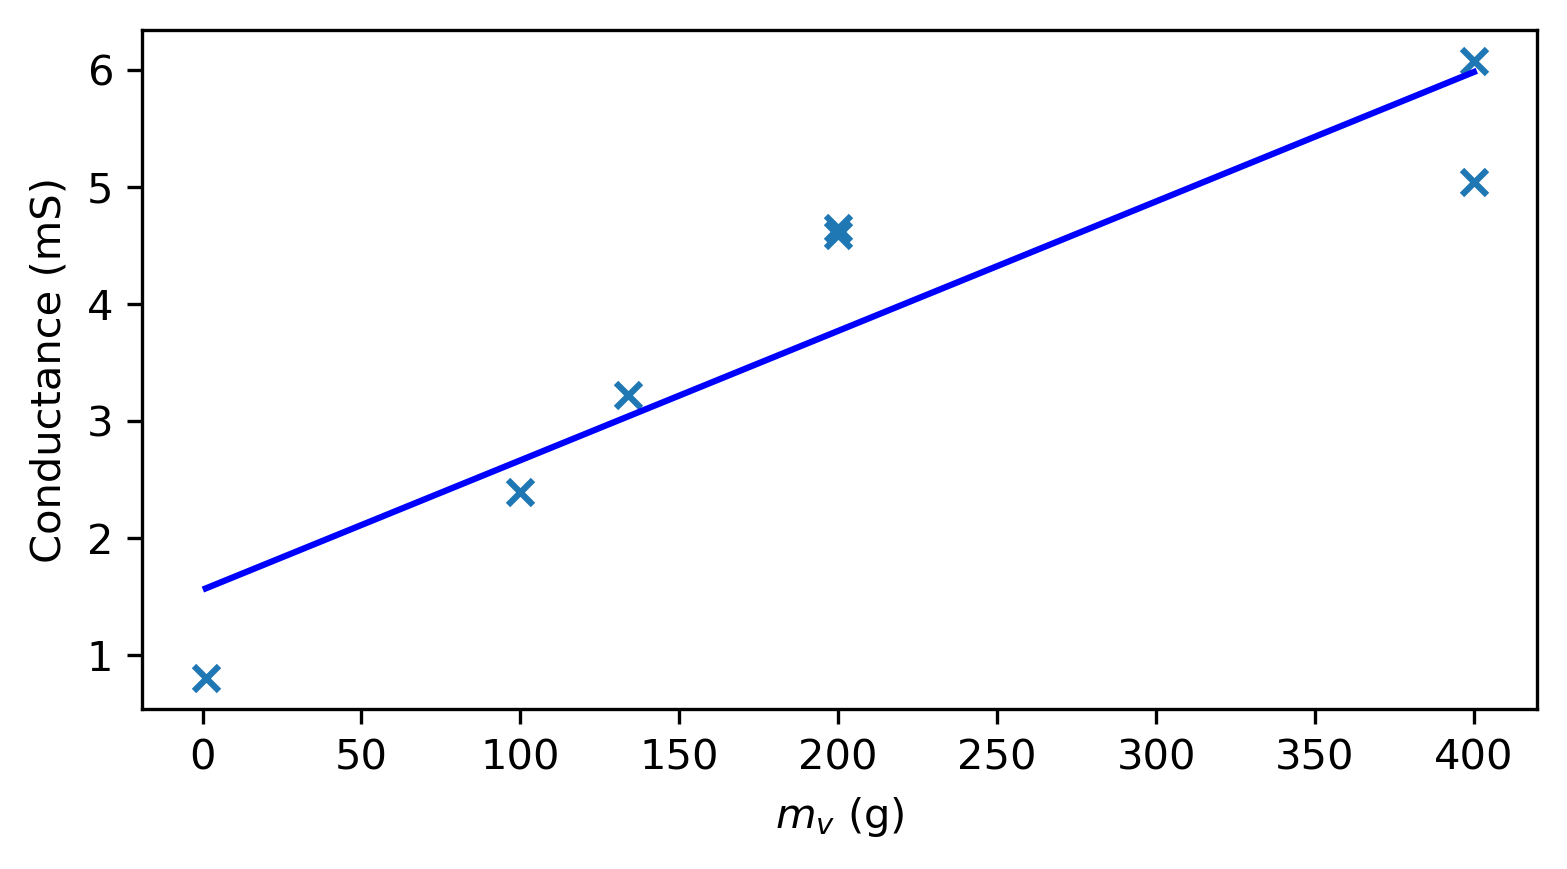

In [23]:
plt.scatter(m_t, G_point, marker = "x")
plt.plot(np.unique(m_t), np.poly1d(np.polyfit(m_t, G_point, 1))(np.unique(m_t)), color = "Blue")

plt.ylabel("Conductance (mS)")
plt.xlabel("$m_v$ (g)")
print(np.poly1d(np.polyfit(m_t, G_point, 1)))
